In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,522 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and d

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## 데이터 탐색

In [ ]:
from google.colab import files
uploaded = files.upload() 

Saving 202004_날짜제거_원본2_통화량단위_주담대.csv to 202004_날짜제거_원본2_통화량단위_주담대 (1).csv


In [ ]:
df = pd.read_csv("202004_날짜제거_원본2_통화량단위_주담대.csv",parse_dates =["DATE"], index_col ="DATE", encoding='euc-kr')
df.rename(columns={'쥬택인허가실적(전국)':'주택인허가실적(전국)'},inplace=True)

In [ ]:
df

,월별_google_trend,전국지가지수,월별_정기예금금리,월별_소비자물가지수,"월별_통화량(M2(평잔, 계절조정계열))",월별_환율,월별 아파트 매매현황(동호수)전국,월별 아파트 매매현황(동호수)서울,월별 아파트 매매현황(동호수)부산,월별 아파트 매매현황(동호수)대구,월별 아파트 매매현황(동호수)인천,월별 아파트 매매현황(동호수)광주,월별 아파트 매매현황(동호수)대전,월별 아파트 매매현황(동호수)울산,월별 아파트 매매현황(동호수)경기,월별 아파트 매매현황(동호수)강원,월별 아파트 매매현황(동호수)충북,월별 아파트 매매현황(동호수)충남,월별 아파트 매매현황(동호수)전북,월별 아파트 매매현황(동호수)전남,월별 아파트 매매현황(동호수)경북,월별 아파트 매매현황(동호수)경남,월별 아파트 매매현황(동호수)제주,주택인허가실적(전국),전국_아파트매매가격,수도권_아파트매매가격,지방_아파트매매가격,서울_아파트매매가격,부산_아파트매매가격,대구_아파트매매가격,인천_아파트매매가격,광주_아파트매매가격,대전_아파트매매가격,울산_아파트매매가격,경기_아파트매매가격,강원_아파트매매가격,충북_아파트매매가격,충남_아파트매매가격,전북_아파트매매가격,전남_아파트매매가격,경북_아파트매매가격,경남_아파트매매가격,제주_아파트매매가격,지가지수_전국,지가지수_서울,지가지수_부산,지가지수_대구,지가지수_인천,지가지수_광주,지가지수_대전,지가지수_울산,지가지수_경기,지가지수_강원,지가지수_충북,지가지수_충남,지가지수_전북,지가지수_전남,지가지수_경북,지가지수_경남,지가지수_제주,주택담보대출금리
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-01-01,81,74.210,4.61,80.640,1144712.0,940.9,47426,6353,3267,2440,3231,2469,1367,1336,13104,1282,1331,1857,2021,1077,2756,2981,554,12038,202.6,281.4,131.9,398.9,155.0,166.1,192.3,117.4,161.1,170.6,250.4,99.3,120.1,129.9,100.9,84.2,103.3,135.6,122.8,74.210,70.295,70.455,70.325,74.763,76.398,75.765,80.718,74.623,77.159,82.478,83.275,79.441,76.327,78.845,80.852,72.663,6.11
2007-02-01,63,74.446,4.76,81.189,1153966.8,938.3,40276,4403,2757,1563,2988,2070,1153,1147,10670,1079,1754,1577,2223,1547,2039,2981,325,17751,200.6,286.0,129.5,414.7,156.0,163.0,194.4,117.6,156.5,163.6,251.5,100.4,121.5,129.3,99.4,83.4,106.4,131.6,121.6,74.446,70.620,70.590,70.533,75.046,76.434,75.913,80.980,74.887,77.260,82.566,83.403,79.535,76.390,78.958,80.982,72.765,6.18
2007-03-01,56,74.658,4.72,81.660,1159543.2,940.3,45822,5597,3539,1727,3662,2134,1227,1294,11552,1966,2186,1955,1892,1317,2575,2983,216,20038,207.4,288.0,129.1,410.2,156.7,162.7,193.2,115.1,155.8,161.7,252.8,97.7,117.6,127.8,96.7,82.0,104.4,129.7,120.1,74.658,70.903,70.726,70.721,75.350,76.466,76.044,81.129,75.122,77.361,82.670,83.521,79.607,76.451,79.074,81.110,72.840,6.20
2007-04-01,50,74.853,4.83,81.973,1167386.8,929.4,46857,5948,4245,1633,3838,2245,1199,1180,11618,1453,1641,2500,2257,1247,2201,3481,171,19186,209.1,292.0,129.5,421.8,151.7,162.1,201.8,115.7,164.5,169.1,259.5,98.1,117.4,128.1,97.0,80.5,104.8,129.6,124.7,74.853,71.149,70.858,70.913,75.666,76.525,76.155,81.291,75.340,77.466,82.761,83.641,79.676,76.507,79.189,81.228,72.893,6.13
2007-05-01,39,75.048,4.78,82.052,1171924.9,929.9,43712,4743,3391,1509,4135,3569,1133,1021,10636,1207,1274,1814,1783,1088,2806,2923,680,30593,213.3,305.1,126.1,465.0,149.6,162.4,207.0,113.9,153.4,155.8,271.2,96.8,112.0,127.9,95.0,78.2,102.5,126.7,137.0,75.048,71.393,70.992,71.100,75.977,76.580,76.267,81.485,75.567,77.575,82.851,83.752,79.755,76.561,79.300,81.347,72.956,6.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-01,37,101.268,0.89,105.670,3191519.6,1088.0,106027,8764,9006,6359,5381,4467,2701,3534,30495,3388,3397,5254,3936,2506,6304,8682,733,96803,491.3,720.6,304.7,1351.5,350.8,389.8,465.7,345.2,422.4,331.1,579.9,240.4,251.3,292.8,224.5,232.2,228.7,275.5,405.3,101.268,101.624,101.546,101.262,101.159,101.301,101.566,100.663,101.263,100.832,100.994,100.866,100.819,101.125,100.753,100.320,99.760,2.59
2021-01-01,41,101.583,0.85,106.470,3232659.8,1114.6,64371,5945,3136,2099,4528,2024,1954,1258,20938,2450,2804,3071,2266,2290,3614,4650,467,26183,490.9,693.8,284.9,1335.1,378.6,363.9,446.6,306.4,419.0,312.8,564.6,239.5,248.4,246.8,199.6,214.6,213.1,258.7,394.3,101.583,102.039,101.831,101.608,101.459,101.610,101.958,100.848,101.575,101.053,101.243,101.073,101.017,101.423,100.937,100.441,99.748,2.63
2021-02-01,37,101.899,0.83,107.000,3274417.0,1108.4,60057,5435,3098,2104,4926,1780,1696,1193,19894,2334,2739,2933,2426,1651,3184,3741,452,33647,459.8,646.5,286.8,1309.5,391.4,380.5,437.2,321.4,416.1,308.4,547.2,230.5,247.0,240.2,200.2,213.

In [ ]:
df.columns

Index(['월별_google_trend', '전국지가지수', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율', '월별 아파트 매매현황(동호수)전국',
       '월별 아파트 매매현황(동호수)서울', '월별 아파트 매매현황(동호수)부산', '월별 아파트 매매현황(동호수)대구',
       '월별 아파트 매매현황(동호수)인천', '월별 아파트 매매현황(동호수)광주', '월별 아파트 매매현황(동호수)대전',
       '월별 아파트 매매현황(동호수)울산', '월별 아파트 매매현황(동호수)경기', '월별 아파트 매매현황(동호수)강원',
       '월별 아파트 매매현황(동호수)충북', '월별 아파트 매매현황(동호수)충남', '월별 아파트 매매현황(동호수)전북',
       '월별 아파트 매매현황(동호수)전남', '월별 아파트 매매현황(동호수)경북', '월별 아파트 매매현황(동호수)경남',
       '월별 아파트 매매현황(동호수)제주', '주택인허가실적(전국)', '전국_아파트매매가격', '수도권_아파트매매가격',
       '지방_아파트매매가격', '서울_아파트매매가격', '부산_아파트매매가격', '대구_아파트매매가격', '인천_아파트매매가격',
       '광주_아파트매매가격', '대전_아파트매매가격', '울산_아파트매매가격', '경기_아파트매매가격', '강원_아파트매매가격',
       '충북_아파트매매가격', '충남_아파트매매가격', '전북_아파트매매가격', '전남_아파트매매가격', '경북_아파트매매가격',
       '경남_아파트매매가격', '제주_아파트매매가격', '지가지수_전국', '지가지수_서울', '지가지수_부산', '지가지수_대구',
       '지가지수_인천', '지가지수_광주', '지가지수_대전', '지가지수_울산', '지가지수_경기', '지가지수_강원',
       '지가지수_충북', '지가지수_충남', '지가지수_전북', '지가지수_전남', '

### 데이터 탐색(상관관계)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


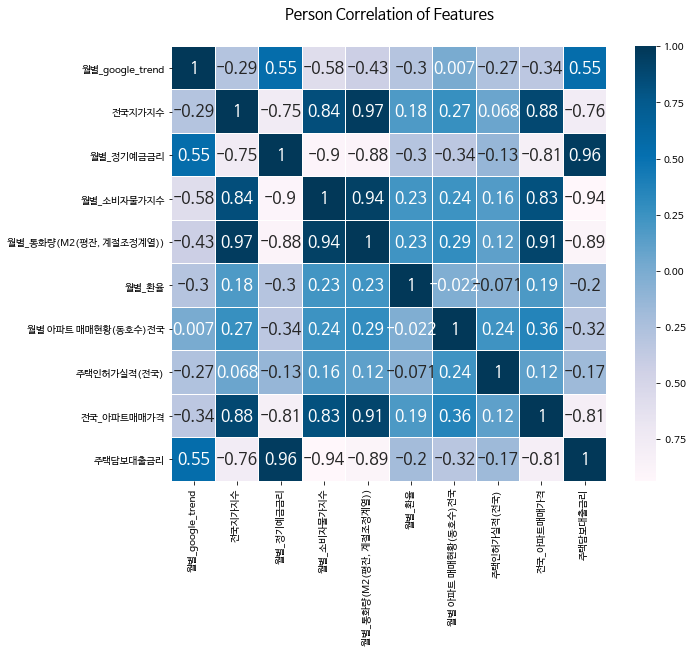

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

heatmap_data = df[['월별_google_trend', '전국지가지수', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율', '월별 아파트 매매현황(동호수)전국',
        '주택인허가실적(전국)', '전국_아파트매매가격','주택담보대출금리']]
colormap = plt.cm.PuBu 
plt.figure(figsize=(10, 8)) 
plt.title("Person Correlation of Features", y = 1.05, size = 15) 
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, 
            square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

### 데이터 탐색(기초통계)

In [ ]:
heatmap_data.describe()

,월별_google_trend,전국지가지수,월별_정기예금금리,월별_소비자물가지수,"월별_통화량(M2(평잔, 계절조정계열))",월별_환율,월별 아파트 매매현황(동호수)전국,주택인허가실적(전국),전국_아파트매매가격,주택담보대출금리
count,172.000000,172.000000,172.000000,172.000000,1.720000e+02,172.000000,172.000000,172.000000,172.000000,172.000000
mean,33.325581,84.164721,2.715814,97.043971,2.073425e+06,1122.725000,53853.988372,44078.406977,325.873837,4.154419
std,8.730456,7.755070,1.363811,7.224082,5.702532e+05,93.526729,15731.970506,27419.305263,83.724999,1.378112
min,21.000000,74.210000,0.800000,80.640000,1.144712e+06,907.400000,16968.000000,0.000000,187.400000,2.390000
25%,27.750000,78.317000,1.585000,91.226000,1.653359e+06,1078.925000,42383.000000,29242.500000,263.800000,3.040000
50%,31.000000,80.966500,2.580000,99.084500,1.961426e+06,1124.000000,52872.000000,38073.500000,308.200000,3.700000
75%,37.000000,89.113500,3.630000,103.085000,2.495542e+06,1167.800000,63349.500000,50352.500000,386.125000,5.010000
max,81.000000,102.601000,6.280000,107.390000,3.363623e+06,1516.400000,106027.000000,160988.000000,532.600000,7.580000


## RandomForest를 통한 전국 아파트 매매가 예측

In [ ]:
split_date = pd.Timestamp('01-01-2020')

train = df.loc[:split_date]
test = df.loc[split_date:]
len(train), len(test)

(157, 16)

In [ ]:
print(train['전국_아파트매매가격'].head(3))
print(train['서울_아파트매매가격'].head(3))

DATE
2007-01-01    202.6
2007-02-01    200.6
2007-03-01    207.4
Name: 전국_아파트매매가격, dtype: float64
DATE
2007-01-01    398.9
2007-02-01    414.7
2007-03-01    410.2
Name: 서울_아파트매매가격, dtype: float64


In [ ]:
train.columns

Index(['월별_google_trend', '전국지가지수', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율', '월별 아파트 매매현황(동호수)전국',
       '월별 아파트 매매현황(동호수)서울', '월별 아파트 매매현황(동호수)부산', '월별 아파트 매매현황(동호수)대구',
       '월별 아파트 매매현황(동호수)인천', '월별 아파트 매매현황(동호수)광주', '월별 아파트 매매현황(동호수)대전',
       '월별 아파트 매매현황(동호수)울산', '월별 아파트 매매현황(동호수)경기', '월별 아파트 매매현황(동호수)강원',
       '월별 아파트 매매현황(동호수)충북', '월별 아파트 매매현황(동호수)충남', '월별 아파트 매매현황(동호수)전북',
       '월별 아파트 매매현황(동호수)전남', '월별 아파트 매매현황(동호수)경북', '월별 아파트 매매현황(동호수)경남',
       '월별 아파트 매매현황(동호수)제주', '주택인허가실적(전국)', '전국_아파트매매가격', '수도권_아파트매매가격',
       '지방_아파트매매가격', '서울_아파트매매가격', '부산_아파트매매가격', '대구_아파트매매가격', '인천_아파트매매가격',
       '광주_아파트매매가격', '대전_아파트매매가격', '울산_아파트매매가격', '경기_아파트매매가격', '강원_아파트매매가격',
       '충북_아파트매매가격', '충남_아파트매매가격', '전북_아파트매매가격', '전남_아파트매매가격', '경북_아파트매매가격',
       '경남_아파트매매가격', '제주_아파트매매가격', '지가지수_전국', '지가지수_서울', '지가지수_부산', '지가지수_대구',
       '지가지수_인천', '지가지수_광주', '지가지수_대전', '지가지수_울산', '지가지수_경기', '지가지수_강원',
       '지가지수_충북', '지가지수_충남', '지가지수_전북', '지가지수_전남', '

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(n_estimators=300)

feature = ['월별_google_trend', '전국지가지수', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율', '월별 아파트 매매현황(동호수)전국',
        '주택인허가실적(전국)','주택담보대출금리']

target = ['전국_아파트매매가격']


all = ['월별_google_trend', '전국지가지수', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율', '월별 아파트 매매현황(동호수)전국',
        '주택인허가실적(전국)','전국_아파트매매가격','주택담보대출금리']

train = train[all]
test = test[all]

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc= sc.fit_transform(train)
test_sc= sc.transform(test)


target = ['전국_아파트매매가격']



train = pd.DataFrame(train_sc,columns=[ '월별_google_trend', '전국지가지수', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율', '월별 아파트 매매현황(동호수)전국', '주택인허가실적(전국)',
       '전국_아파트매매가격','주택담보대출금리'] , index=train.index)
test = pd.DataFrame(test_sc,columns=[ '월별_google_trend', '전국지가지수', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율', '월별 아파트 매매현황(동호수)전국', '주택인허가실적(전국)',
       '전국_아파트매매가격','주택담보대출금리'] , index=test.index)


X_train = train[feature]
y_train = train[target]

X_test = test[feature]
y_test = test[target]

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'훈련 에러: {mae:.2f}')

훈련 에러: 0.02


In [ ]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')

테스트 에러: 0.09


In [ ]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(y_test, y_pred)**0.5
print(f'테스트 RMSE: {RMSE:.2f}')

테스트 RMSE: 0.12


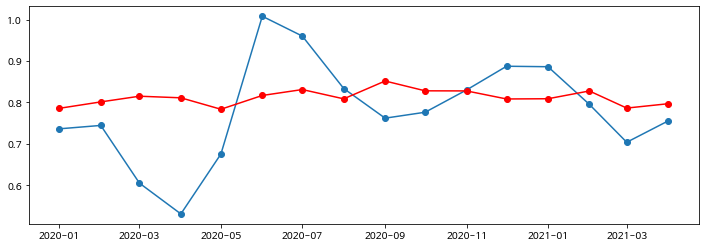

In [ ]:
fig = plt.figure(figsize = (12, 4)) 
y_pred = model.predict(X_test)
y_pred2 = pd.DataFrame(y_pred, index=X_test.index)
#pd.DataFrame(train_sc, index=train.index)
#print(y_pred2)
plt.plot(y_test, 'o-', label='Predicted')
#plt.xticks(X_test.index)
plt.plot(y_pred2, 'o-', color='red')

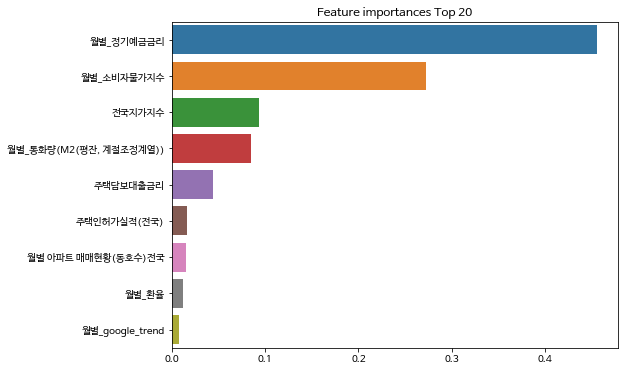

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


importances_values = model.feature_importances_
importances = pd.Series(importances_values, index=X_train.columns)
top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()

##RandomForest를 통한 서울 아파트 매매가 예측

In [ ]:
split_date = pd.Timestamp('01-01-2019')

train = df.loc[:split_date]
test = df.loc[split_date:]
len(train), len(test)

(145, 28)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


model_seoul = RandomForestRegressor(n_estimators=200,max_depth=8)


all = ['월별_google_trend', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율', '월별 아파트 매매현황(동호수)서울', '월별 아파트 매매현황(동호수)부산', '월별 아파트 매매현황(동호수)대구',
       '월별 아파트 매매현황(동호수)인천', '월별 아파트 매매현황(동호수)광주', '월별 아파트 매매현황(동호수)대전',
       '월별 아파트 매매현황(동호수)울산', '월별 아파트 매매현황(동호수)경기', '월별 아파트 매매현황(동호수)강원',
       '월별 아파트 매매현황(동호수)충북', '월별 아파트 매매현황(동호수)충남', '월별 아파트 매매현황(동호수)전북',
       '월별 아파트 매매현황(동호수)전남', '월별 아파트 매매현황(동호수)경북', '월별 아파트 매매현황(동호수)경남',
       '월별 아파트 매매현황(동호수)제주', '지가지수_부산', '지가지수_대구',
       '지가지수_인천', '지가지수_광주', '지가지수_대전', '지가지수_울산', '지가지수_경기', '지가지수_강원',
       '지가지수_충북', '지가지수_충남', '지가지수_전북', '지가지수_전남', '지가지수_경북', '지가지수_경남',
       '지가지수_제주','부산_아파트매매가격', '대구_아파트매매가격', '인천_아파트매매가격',
       '광주_아파트매매가격', '대전_아파트매매가격', '울산_아파트매매가격', '경기_아파트매매가격', '강원_아파트매매가격',
       '충북_아파트매매가격', '충남_아파트매매가격', '전북_아파트매매가격', '전남_아파트매매가격', '경북_아파트매매가격',
       '경남_아파트매매가격', '제주_아파트매매가격',
        '주택인허가실적(전국)','서울_아파트매매가격','주택담보대출금리','지가지수_서울']

train = train[all]
test = test[all]

In [ ]:
train.columns

Index(['월별_google_trend', '월별_정기예금금리', '월별_소비자물가지수', '월별_통화량(M2(평잔, 계절조정계열))',
       '월별_환율', '월별 아파트 매매현황(동호수)서울', '월별 아파트 매매현황(동호수)부산',
       '월별 아파트 매매현황(동호수)대구', '월별 아파트 매매현황(동호수)인천', '월별 아파트 매매현황(동호수)광주',
       '월별 아파트 매매현황(동호수)대전', '월별 아파트 매매현황(동호수)울산', '월별 아파트 매매현황(동호수)경기',
       '월별 아파트 매매현황(동호수)강원', '월별 아파트 매매현황(동호수)충북', '월별 아파트 매매현황(동호수)충남',
       '월별 아파트 매매현황(동호수)전북', '월별 아파트 매매현황(동호수)전남', '월별 아파트 매매현황(동호수)경북',
       '월별 아파트 매매현황(동호수)경남', '월별 아파트 매매현황(동호수)제주', '지가지수_부산', '지가지수_대구',
       '지가지수_인천', '지가지수_광주', '지가지수_대전', '지가지수_울산', '지가지수_경기', '지가지수_강원',
       '지가지수_충북', '지가지수_충남', '지가지수_전북', '지가지수_전남', '지가지수_경북', '지가지수_경남',
       '지가지수_제주', '부산_아파트매매가격', '대구_아파트매매가격', '인천_아파트매매가격', '광주_아파트매매가격',
       '대전_아파트매매가격', '울산_아파트매매가격', '경기_아파트매매가격', '강원_아파트매매가격', '충북_아파트매매가격',
       '충남_아파트매매가격', '전북_아파트매매가격', '전남_아파트매매가격', '경북_아파트매매가격', '경남_아파트매매가격',
       '제주_아파트매매가격', '주택인허가실적(전국)', '서울_아파트매매가격', '주택담보대출금리', '지가지수_서울'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc= sc.fit_transform(train)
test_sc= sc.transform(test)




train = pd.DataFrame(train_sc,columns=['월별_google_trend', '월별_정기예금금리', '월별_소비자물가지수', '월별_통화량(M2(평잔, 계절조정계열))',
       '월별_환율', '월별 아파트 매매현황(동호수)서울', '월별 아파트 매매현황(동호수)부산',
       '월별 아파트 매매현황(동호수)대구', '월별 아파트 매매현황(동호수)인천', '월별 아파트 매매현황(동호수)광주',
       '월별 아파트 매매현황(동호수)대전', '월별 아파트 매매현황(동호수)울산', '월별 아파트 매매현황(동호수)경기',
       '월별 아파트 매매현황(동호수)강원', '월별 아파트 매매현황(동호수)충북', '월별 아파트 매매현황(동호수)충남',
       '월별 아파트 매매현황(동호수)전북', '월별 아파트 매매현황(동호수)전남', '월별 아파트 매매현황(동호수)경북',
       '월별 아파트 매매현황(동호수)경남', '월별 아파트 매매현황(동호수)제주', '지가지수_부산', '지가지수_대구',
       '지가지수_인천', '지가지수_광주', '지가지수_대전', '지가지수_울산', '지가지수_경기', '지가지수_강원',
       '지가지수_충북', '지가지수_충남', '지가지수_전북', '지가지수_전남', '지가지수_경북', '지가지수_경남',
       '지가지수_제주', '부산_아파트매매가격', '대구_아파트매매가격', '인천_아파트매매가격', '광주_아파트매매가격',
       '대전_아파트매매가격', '울산_아파트매매가격', '경기_아파트매매가격', '강원_아파트매매가격', '충북_아파트매매가격',
       '충남_아파트매매가격', '전북_아파트매매가격', '전남_아파트매매가격', '경북_아파트매매가격', '경남_아파트매매가격',
       '제주_아파트매매가격', '주택인허가실적(전국)', '서울_아파트매매가격', '주택담보대출금리', '지가지수_서울'] , index=train.index)


test = pd.DataFrame(test_sc,columns=['월별_google_trend', '월별_정기예금금리', '월별_소비자물가지수', '월별_통화량(M2(평잔, 계절조정계열))',
       '월별_환율', '월별 아파트 매매현황(동호수)서울', '월별 아파트 매매현황(동호수)부산',
       '월별 아파트 매매현황(동호수)대구', '월별 아파트 매매현황(동호수)인천', '월별 아파트 매매현황(동호수)광주',
       '월별 아파트 매매현황(동호수)대전', '월별 아파트 매매현황(동호수)울산', '월별 아파트 매매현황(동호수)경기',
       '월별 아파트 매매현황(동호수)강원', '월별 아파트 매매현황(동호수)충북', '월별 아파트 매매현황(동호수)충남',
       '월별 아파트 매매현황(동호수)전북', '월별 아파트 매매현황(동호수)전남', '월별 아파트 매매현황(동호수)경북',
       '월별 아파트 매매현황(동호수)경남', '월별 아파트 매매현황(동호수)제주', '지가지수_부산', '지가지수_대구',
       '지가지수_인천', '지가지수_광주', '지가지수_대전', '지가지수_울산', '지가지수_경기', '지가지수_강원',
       '지가지수_충북', '지가지수_충남', '지가지수_전북', '지가지수_전남', '지가지수_경북', '지가지수_경남',
       '지가지수_제주', '부산_아파트매매가격', '대구_아파트매매가격', '인천_아파트매매가격', '광주_아파트매매가격',
       '대전_아파트매매가격', '울산_아파트매매가격', '경기_아파트매매가격', '강원_아파트매매가격', '충북_아파트매매가격',
       '충남_아파트매매가격', '전북_아파트매매가격', '전남_아파트매매가격', '경북_아파트매매가격', '경남_아파트매매가격',
       '제주_아파트매매가격', '주택인허가실적(전국)', '서울_아파트매매가격', '주택담보대출금리', '지가지수_서울'] , index=test.index)


feature = ['월별_google_trend', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율','월별 아파트 매매현황(동호수)서울', '월별 아파트 매매현황(동호수)부산', '월별 아파트 매매현황(동호수)대구',
       '월별 아파트 매매현황(동호수)인천', '월별 아파트 매매현황(동호수)광주', '월별 아파트 매매현황(동호수)대전',
       '월별 아파트 매매현황(동호수)울산', '월별 아파트 매매현황(동호수)경기', '월별 아파트 매매현황(동호수)강원',
       '월별 아파트 매매현황(동호수)충북', '월별 아파트 매매현황(동호수)충남', '월별 아파트 매매현황(동호수)전북',
       '월별 아파트 매매현황(동호수)전남', '월별 아파트 매매현황(동호수)경북', '월별 아파트 매매현황(동호수)경남',
       '월별 아파트 매매현황(동호수)제주',
        '주택인허가실적(전국)','주택담보대출금리']

target = ['서울_아파트매매가격']




X_train = train[feature]
y_train = train[target]

X_test = test[feature]
y_test = test[target]

In [ ]:
model_seoul.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred = model_seoul.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'훈련 에러: {mae:.2f}')

훈련 에러: 0.02


In [ ]:
y_pred = model_seoul.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')

테스트 에러: 0.69


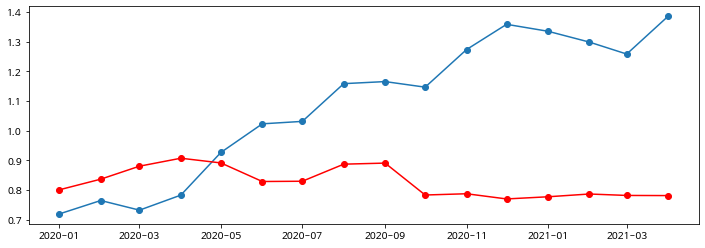

In [ ]:
fig = plt.figure(figsize = (12, 4)) 
y_pred = model_seoul.predict(X_test)
y_pred2 = pd.DataFrame(y_pred, index=X_test.index)
#pd.DataFrame(train_sc, index=train.index)
#print(y_pred2)
plt.plot(y_test, 'o-', label='Predicted')
#plt.xticks(X_test.index)
plt.plot(y_pred2, 'o-', color='red')

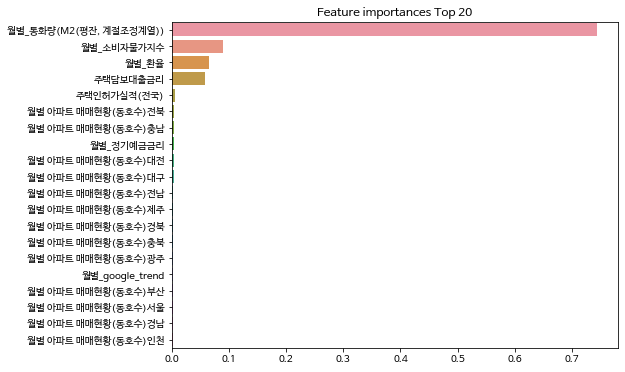

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


importances_values = model_seoul.feature_importances_
importances = pd.Series(importances_values, index=X_train.columns)
top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()



---



##RandomForest를 통한 부산 아파트 매매가격 예측

In [ ]:
split_date = pd.Timestamp('01-01-2019')

train = df.loc[:split_date]
test = df.loc[split_date:]
len(train), len(test)

(145, 28)

In [ ]:
df.columns

Index(['월별_google_trend', '전국지가지수', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율', '월별 아파트 매매현황(동호수)전국',
       '월별 아파트 매매현황(동호수)서울', '월별 아파트 매매현황(동호수)부산', '월별 아파트 매매현황(동호수)대구',
       '월별 아파트 매매현황(동호수)인천', '월별 아파트 매매현황(동호수)광주', '월별 아파트 매매현황(동호수)대전',
       '월별 아파트 매매현황(동호수)울산', '월별 아파트 매매현황(동호수)경기', '월별 아파트 매매현황(동호수)강원',
       '월별 아파트 매매현황(동호수)충북', '월별 아파트 매매현황(동호수)충남', '월별 아파트 매매현황(동호수)전북',
       '월별 아파트 매매현황(동호수)전남', '월별 아파트 매매현황(동호수)경북', '월별 아파트 매매현황(동호수)경남',
       '월별 아파트 매매현황(동호수)제주', '주택인허가실적(전국)', '전국_아파트매매가격', '수도권_아파트매매가격',
       '지방_아파트매매가격', '서울_아파트매매가격', '부산_아파트매매가격', '대구_아파트매매가격', '인천_아파트매매가격',
       '광주_아파트매매가격', '대전_아파트매매가격', '울산_아파트매매가격', '경기_아파트매매가격', '강원_아파트매매가격',
       '충북_아파트매매가격', '충남_아파트매매가격', '전북_아파트매매가격', '전남_아파트매매가격', '경북_아파트매매가격',
       '경남_아파트매매가격', '제주_아파트매매가격', '지가지수_전국', '지가지수_서울', '지가지수_부산', '지가지수_대구',
       '지가지수_인천', '지가지수_광주', '지가지수_대전', '지가지수_울산', '지가지수_경기', '지가지수_강원',
       '지가지수_충북', '지가지수_충남', '지가지수_전북', '지가지수_전남', '

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


model_busan = RandomForestRegressor(n_estimators=150)


all = ['월별_google_trend', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율',
       '월별 아파트 매매현황(동호수)서울', '월별 아파트 매매현황(동호수)부산', '월별 아파트 매매현황(동호수)대구',
       '월별 아파트 매매현황(동호수)인천', '월별 아파트 매매현황(동호수)광주', '월별 아파트 매매현황(동호수)대전',
       '월별 아파트 매매현황(동호수)울산', '월별 아파트 매매현황(동호수)경기', '월별 아파트 매매현황(동호수)강원',
       '월별 아파트 매매현황(동호수)충북', '월별 아파트 매매현황(동호수)충남', '월별 아파트 매매현황(동호수)전북',
       '월별 아파트 매매현황(동호수)전남', '월별 아파트 매매현황(동호수)경북', '월별 아파트 매매현황(동호수)경남',
       '월별 아파트 매매현황(동호수)제주', '주택인허가실적(전국)',
       '서울_아파트매매가격', '부산_아파트매매가격', '대구_아파트매매가격', '인천_아파트매매가격',
       '광주_아파트매매가격', '대전_아파트매매가격', '울산_아파트매매가격', '경기_아파트매매가격', '강원_아파트매매가격',
       '충북_아파트매매가격', '충남_아파트매매가격', '전북_아파트매매가격', '전남_아파트매매가격', '경북_아파트매매가격',
       '경남_아파트매매가격', '제주_아파트매매가격', '지가지수_서울', '지가지수_부산', '지가지수_대구',
       '지가지수_인천', '지가지수_광주', '지가지수_대전', '지가지수_울산', '지가지수_경기', '지가지수_강원',
       '지가지수_충북', '지가지수_충남', '지가지수_전북', '지가지수_전남', '지가지수_경북', '지가지수_경남',
       '지가지수_제주', '주택담보대출금리']

train = train[all]
test = test[all]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc= sc.fit_transform(train)
test_sc= sc.transform(test)




train = pd.DataFrame(train_sc,columns=['월별_google_trend', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율',
       '월별 아파트 매매현황(동호수)서울', '월별 아파트 매매현황(동호수)부산', '월별 아파트 매매현황(동호수)대구',
       '월별 아파트 매매현황(동호수)인천', '월별 아파트 매매현황(동호수)광주', '월별 아파트 매매현황(동호수)대전',
       '월별 아파트 매매현황(동호수)울산', '월별 아파트 매매현황(동호수)경기', '월별 아파트 매매현황(동호수)강원',
       '월별 아파트 매매현황(동호수)충북', '월별 아파트 매매현황(동호수)충남', '월별 아파트 매매현황(동호수)전북',
       '월별 아파트 매매현황(동호수)전남', '월별 아파트 매매현황(동호수)경북', '월별 아파트 매매현황(동호수)경남',
       '월별 아파트 매매현황(동호수)제주', '주택인허가실적(전국)',
       '서울_아파트매매가격', '부산_아파트매매가격', '대구_아파트매매가격', '인천_아파트매매가격',
       '광주_아파트매매가격', '대전_아파트매매가격', '울산_아파트매매가격', '경기_아파트매매가격', '강원_아파트매매가격',
       '충북_아파트매매가격', '충남_아파트매매가격', '전북_아파트매매가격', '전남_아파트매매가격', '경북_아파트매매가격',
       '경남_아파트매매가격', '제주_아파트매매가격', '지가지수_서울', '지가지수_부산', '지가지수_대구',
       '지가지수_인천', '지가지수_광주', '지가지수_대전', '지가지수_울산', '지가지수_경기', '지가지수_강원',
       '지가지수_충북', '지가지수_충남', '지가지수_전북', '지가지수_전남', '지가지수_경북', '지가지수_경남',
       '지가지수_제주', '주택담보대출금리'] , index=train.index)


test = pd.DataFrame(test_sc,columns=['월별_google_trend', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율',
       '월별 아파트 매매현황(동호수)서울', '월별 아파트 매매현황(동호수)부산', '월별 아파트 매매현황(동호수)대구',
       '월별 아파트 매매현황(동호수)인천', '월별 아파트 매매현황(동호수)광주', '월별 아파트 매매현황(동호수)대전',
       '월별 아파트 매매현황(동호수)울산', '월별 아파트 매매현황(동호수)경기', '월별 아파트 매매현황(동호수)강원',
       '월별 아파트 매매현황(동호수)충북', '월별 아파트 매매현황(동호수)충남', '월별 아파트 매매현황(동호수)전북',
       '월별 아파트 매매현황(동호수)전남', '월별 아파트 매매현황(동호수)경북', '월별 아파트 매매현황(동호수)경남',
       '월별 아파트 매매현황(동호수)제주', '주택인허가실적(전국)',
       '서울_아파트매매가격', '부산_아파트매매가격', '대구_아파트매매가격', '인천_아파트매매가격',
       '광주_아파트매매가격', '대전_아파트매매가격', '울산_아파트매매가격', '경기_아파트매매가격', '강원_아파트매매가격',
       '충북_아파트매매가격', '충남_아파트매매가격', '전북_아파트매매가격', '전남_아파트매매가격', '경북_아파트매매가격',
       '경남_아파트매매가격', '제주_아파트매매가격', '지가지수_서울', '지가지수_부산', '지가지수_대구',
       '지가지수_인천', '지가지수_광주', '지가지수_대전', '지가지수_울산', '지가지수_경기', '지가지수_강원',
       '지가지수_충북', '지가지수_충남', '지가지수_전북', '지가지수_전남', '지가지수_경북', '지가지수_경남',
       '지가지수_제주', '주택담보대출금리'] , index=test.index)


feature = ['월별_google_trend', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율',
       '월별 아파트 매매현황(동호수)서울', '월별 아파트 매매현황(동호수)부산', '월별 아파트 매매현황(동호수)대구',
       '월별 아파트 매매현황(동호수)인천', '월별 아파트 매매현황(동호수)광주', '월별 아파트 매매현황(동호수)대전',
       '월별 아파트 매매현황(동호수)울산', '월별 아파트 매매현황(동호수)경기', '월별 아파트 매매현황(동호수)강원',
       '월별 아파트 매매현황(동호수)충북', '월별 아파트 매매현황(동호수)충남', '월별 아파트 매매현황(동호수)전북',
       '월별 아파트 매매현황(동호수)전남', '월별 아파트 매매현황(동호수)경북', '월별 아파트 매매현황(동호수)경남',
       '월별 아파트 매매현황(동호수)제주', '주택인허가실적(전국)',
       '서울_아파트매매가격', '대구_아파트매매가격', '인천_아파트매매가격',
       '광주_아파트매매가격', '대전_아파트매매가격', '울산_아파트매매가격', '경기_아파트매매가격', '강원_아파트매매가격',
       '충북_아파트매매가격', '충남_아파트매매가격', '전북_아파트매매가격', '전남_아파트매매가격', '경북_아파트매매가격',
       '경남_아파트매매가격', '제주_아파트매매가격', '지가지수_서울', '지가지수_부산', '지가지수_대구',
       '지가지수_인천', '지가지수_광주', '지가지수_대전', '지가지수_울산', '지가지수_경기', '지가지수_강원',
       '지가지수_충북', '지가지수_충남', '지가지수_전북', '지가지수_전남', '지가지수_경북', '지가지수_경남',
       '지가지수_제주', '주택담보대출금리']

target = ['부산_아파트매매가격']




X_train = train[feature]
y_train = train[target]

X_test = test[feature]
y_test = test[target]

In [ ]:
model_busan.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred = model_busan.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'훈련 에러: {mae:.2f}')

훈련 에러: 0.01


In [ ]:
y_pred = model_busan.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')

테스트 에러: 0.18


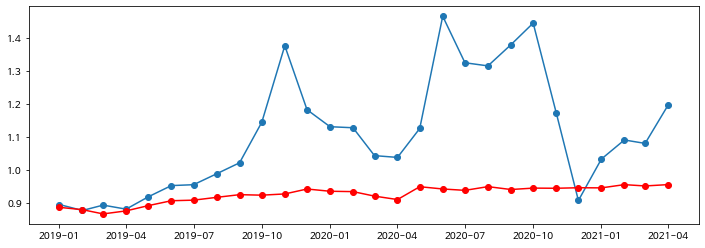

In [ ]:
fig = plt.figure(figsize = (12, 4)) 
y_pred = model_busan.predict(X_test)
y_pred2 = pd.DataFrame(y_pred, index=X_test.index)
#pd.DataFrame(train_sc, index=train.index)
#print(y_pred2)
plt.plot(y_test, 'o-', label='Predicted')
#plt.xticks(X_test.index)
plt.plot(y_pred2, 'o-', color='red')

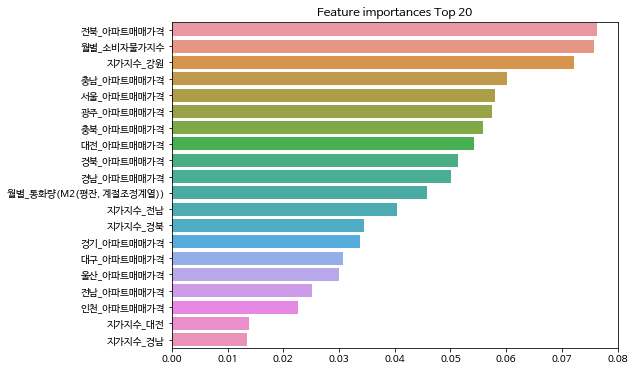

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


importances_values = model_busan.feature_importances_
importances = pd.Series(importances_values, index=X_train.columns)
top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()



---



##RandomForest를 통한  경기도 아파트 매매가 예측

In [ ]:
split_date = pd.Timestamp('01-01-2019')

train = df.loc[:split_date]
test = df.loc[split_date:]
len(train), len(test)

(145, 28)

In [ ]:
df.columns

Index(['월별_google_trend', '전국지가지수', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율', '월별 아파트 매매현황(동호수)전국',
       '월별 아파트 매매현황(동호수)서울', '월별 아파트 매매현황(동호수)부산', '월별 아파트 매매현황(동호수)대구',
       '월별 아파트 매매현황(동호수)인천', '월별 아파트 매매현황(동호수)광주', '월별 아파트 매매현황(동호수)대전',
       '월별 아파트 매매현황(동호수)울산', '월별 아파트 매매현황(동호수)경기', '월별 아파트 매매현황(동호수)강원',
       '월별 아파트 매매현황(동호수)충북', '월별 아파트 매매현황(동호수)충남', '월별 아파트 매매현황(동호수)전북',
       '월별 아파트 매매현황(동호수)전남', '월별 아파트 매매현황(동호수)경북', '월별 아파트 매매현황(동호수)경남',
       '월별 아파트 매매현황(동호수)제주', '주택인허가실적(전국)', '전국_아파트매매가격', '수도권_아파트매매가격',
       '지방_아파트매매가격', '서울_아파트매매가격', '부산_아파트매매가격', '대구_아파트매매가격', '인천_아파트매매가격',
       '광주_아파트매매가격', '대전_아파트매매가격', '울산_아파트매매가격', '경기_아파트매매가격', '강원_아파트매매가격',
       '충북_아파트매매가격', '충남_아파트매매가격', '전북_아파트매매가격', '전남_아파트매매가격', '경북_아파트매매가격',
       '경남_아파트매매가격', '제주_아파트매매가격', '지가지수_전국', '지가지수_서울', '지가지수_부산', '지가지수_대구',
       '지가지수_인천', '지가지수_광주', '지가지수_대전', '지가지수_울산', '지가지수_경기', '지가지수_강원',
       '지가지수_충북', '지가지수_충남', '지가지수_전북', '지가지수_전남', '

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


model_kyungki = RandomForestRegressor(n_estimators=150)


all = ['월별_google_trend', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율',
       '월별 아파트 매매현황(동호수)서울', '월별 아파트 매매현황(동호수)부산', '월별 아파트 매매현황(동호수)대구',
       '월별 아파트 매매현황(동호수)인천', '월별 아파트 매매현황(동호수)광주', '월별 아파트 매매현황(동호수)대전',
       '월별 아파트 매매현황(동호수)울산', '월별 아파트 매매현황(동호수)경기', '월별 아파트 매매현황(동호수)강원',
       '월별 아파트 매매현황(동호수)충북', '월별 아파트 매매현황(동호수)충남', '월별 아파트 매매현황(동호수)전북',
       '월별 아파트 매매현황(동호수)전남', '월별 아파트 매매현황(동호수)경북', '월별 아파트 매매현황(동호수)경남',
       '월별 아파트 매매현황(동호수)제주', '주택인허가실적(전국)',
       '서울_아파트매매가격', '부산_아파트매매가격', '대구_아파트매매가격', '인천_아파트매매가격',
       '광주_아파트매매가격', '대전_아파트매매가격', '울산_아파트매매가격', '경기_아파트매매가격', '강원_아파트매매가격',
       '충북_아파트매매가격', '충남_아파트매매가격', '전북_아파트매매가격', '전남_아파트매매가격', '경북_아파트매매가격',
       '경남_아파트매매가격', '제주_아파트매매가격', '지가지수_서울', '지가지수_부산', '지가지수_대구',
       '지가지수_인천', '지가지수_광주', '지가지수_대전', '지가지수_울산', '지가지수_경기', '지가지수_강원',
       '지가지수_충북', '지가지수_충남', '지가지수_전북', '지가지수_전남', '지가지수_경북', '지가지수_경남',
       '지가지수_제주', '주택담보대출금리']

train = train[all]
test = test[all]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc= sc.fit_transform(train)
test_sc= sc.transform(test)




train = pd.DataFrame(train_sc,columns=['월별_google_trend', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율',
       '월별 아파트 매매현황(동호수)서울', '월별 아파트 매매현황(동호수)부산', '월별 아파트 매매현황(동호수)대구',
       '월별 아파트 매매현황(동호수)인천', '월별 아파트 매매현황(동호수)광주', '월별 아파트 매매현황(동호수)대전',
       '월별 아파트 매매현황(동호수)울산', '월별 아파트 매매현황(동호수)경기', '월별 아파트 매매현황(동호수)강원',
       '월별 아파트 매매현황(동호수)충북', '월별 아파트 매매현황(동호수)충남', '월별 아파트 매매현황(동호수)전북',
       '월별 아파트 매매현황(동호수)전남', '월별 아파트 매매현황(동호수)경북', '월별 아파트 매매현황(동호수)경남',
       '월별 아파트 매매현황(동호수)제주', '주택인허가실적(전국)',
       '서울_아파트매매가격', '부산_아파트매매가격', '대구_아파트매매가격', '인천_아파트매매가격',
       '광주_아파트매매가격', '대전_아파트매매가격', '울산_아파트매매가격', '경기_아파트매매가격', '강원_아파트매매가격',
       '충북_아파트매매가격', '충남_아파트매매가격', '전북_아파트매매가격', '전남_아파트매매가격', '경북_아파트매매가격',
       '경남_아파트매매가격', '제주_아파트매매가격', '지가지수_서울', '지가지수_부산', '지가지수_대구',
       '지가지수_인천', '지가지수_광주', '지가지수_대전', '지가지수_울산', '지가지수_경기', '지가지수_강원',
       '지가지수_충북', '지가지수_충남', '지가지수_전북', '지가지수_전남', '지가지수_경북', '지가지수_경남',
       '지가지수_제주', '주택담보대출금리'] , index=train.index)


test = pd.DataFrame(test_sc,columns=['월별_google_trend', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율',
       '월별 아파트 매매현황(동호수)서울', '월별 아파트 매매현황(동호수)부산', '월별 아파트 매매현황(동호수)대구',
       '월별 아파트 매매현황(동호수)인천', '월별 아파트 매매현황(동호수)광주', '월별 아파트 매매현황(동호수)대전',
       '월별 아파트 매매현황(동호수)울산', '월별 아파트 매매현황(동호수)경기', '월별 아파트 매매현황(동호수)강원',
       '월별 아파트 매매현황(동호수)충북', '월별 아파트 매매현황(동호수)충남', '월별 아파트 매매현황(동호수)전북',
       '월별 아파트 매매현황(동호수)전남', '월별 아파트 매매현황(동호수)경북', '월별 아파트 매매현황(동호수)경남',
       '월별 아파트 매매현황(동호수)제주', '주택인허가실적(전국)',
       '서울_아파트매매가격', '부산_아파트매매가격', '대구_아파트매매가격', '인천_아파트매매가격',
       '광주_아파트매매가격', '대전_아파트매매가격', '울산_아파트매매가격', '경기_아파트매매가격', '강원_아파트매매가격',
       '충북_아파트매매가격', '충남_아파트매매가격', '전북_아파트매매가격', '전남_아파트매매가격', '경북_아파트매매가격',
       '경남_아파트매매가격', '제주_아파트매매가격', '지가지수_서울', '지가지수_부산', '지가지수_대구',
       '지가지수_인천', '지가지수_광주', '지가지수_대전', '지가지수_울산', '지가지수_경기', '지가지수_강원',
       '지가지수_충북', '지가지수_충남', '지가지수_전북', '지가지수_전남', '지가지수_경북', '지가지수_경남',
       '지가지수_제주', '주택담보대출금리'] , index=test.index)


feature = ['월별_google_trend', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율',
       '월별 아파트 매매현황(동호수)서울', '월별 아파트 매매현황(동호수)부산', '월별 아파트 매매현황(동호수)대구',
       '월별 아파트 매매현황(동호수)인천', '월별 아파트 매매현황(동호수)광주', '월별 아파트 매매현황(동호수)대전',
       '월별 아파트 매매현황(동호수)울산', '월별 아파트 매매현황(동호수)경기', '월별 아파트 매매현황(동호수)강원',
       '월별 아파트 매매현황(동호수)충북', '월별 아파트 매매현황(동호수)충남', '월별 아파트 매매현황(동호수)전북',
       '월별 아파트 매매현황(동호수)전남', '월별 아파트 매매현황(동호수)경북', '월별 아파트 매매현황(동호수)경남',
       '월별 아파트 매매현황(동호수)제주', '주택인허가실적(전국)',
       '서울_아파트매매가격', '부산_아파트매매가격','대구_아파트매매가격', '인천_아파트매매가격',
       '광주_아파트매매가격', '대전_아파트매매가격', '울산_아파트매매가격', '강원_아파트매매가격',
       '충북_아파트매매가격', '충남_아파트매매가격', '전북_아파트매매가격', '전남_아파트매매가격', '경북_아파트매매가격',
       '경남_아파트매매가격', '제주_아파트매매가격', '지가지수_서울', '지가지수_부산', '지가지수_대구',
       '지가지수_인천', '지가지수_광주', '지가지수_대전', '지가지수_울산', '지가지수_경기', '지가지수_강원',
       '지가지수_충북', '지가지수_충남', '지가지수_전북', '지가지수_전남', '지가지수_경북', '지가지수_경남',
       '지가지수_제주', '주택담보대출금리']

target = ['경기_아파트매매가격']




X_train = train[feature]
y_train = train[target]

X_test = test[feature]
y_test = test[target]

In [ ]:
model_kyungki.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred = model_kyungki.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'훈련 에러: {mae:.2f}')

훈련 에러: 0.01


In [ ]:
y_pred = model_kyungki.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')

테스트 에러: 0.23


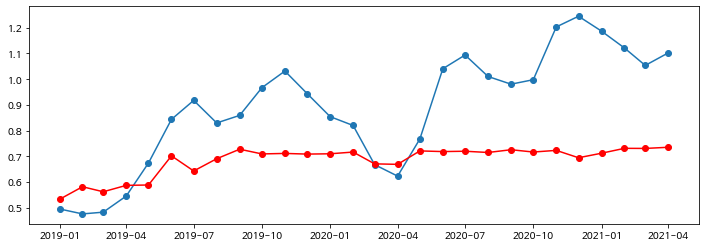

In [ ]:
fig = plt.figure(figsize = (12, 4)) 
y_pred = model_kyungki.predict(X_test)
y_pred2 = pd.DataFrame(y_pred, index=X_test.index)
#pd.DataFrame(train_sc, index=train.index)
#print(y_pred2)
plt.plot(y_test, 'o-', label='Predicted')
#plt.xticks(X_test.index)
plt.plot(y_pred2, 'o-', color='red')

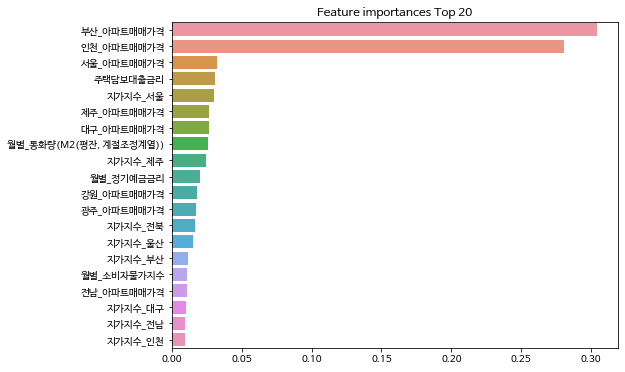

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


importances_values = model_kyungki.feature_importances_
importances = pd.Series(importances_values, index=X_train.columns)
top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()



---



##RandomForest를 통한 인천 아파트 매매가 예측

In [ ]:
split_date = pd.Timestamp('01-01-2019')

train = df.loc[:split_date]
test = df.loc[split_date:]
len(train), len(test)

(145, 28)

In [ ]:
df.columns

Index(['월별_google_trend', '전국지가지수', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율', '월별 아파트 매매현황(동호수)전국',
       '월별 아파트 매매현황(동호수)서울', '월별 아파트 매매현황(동호수)부산', '월별 아파트 매매현황(동호수)대구',
       '월별 아파트 매매현황(동호수)인천', '월별 아파트 매매현황(동호수)광주', '월별 아파트 매매현황(동호수)대전',
       '월별 아파트 매매현황(동호수)울산', '월별 아파트 매매현황(동호수)경기', '월별 아파트 매매현황(동호수)강원',
       '월별 아파트 매매현황(동호수)충북', '월별 아파트 매매현황(동호수)충남', '월별 아파트 매매현황(동호수)전북',
       '월별 아파트 매매현황(동호수)전남', '월별 아파트 매매현황(동호수)경북', '월별 아파트 매매현황(동호수)경남',
       '월별 아파트 매매현황(동호수)제주', '주택인허가실적(전국)', '전국_아파트매매가격', '수도권_아파트매매가격',
       '지방_아파트매매가격', '서울_아파트매매가격', '부산_아파트매매가격', '대구_아파트매매가격', '인천_아파트매매가격',
       '광주_아파트매매가격', '대전_아파트매매가격', '울산_아파트매매가격', '경기_아파트매매가격', '강원_아파트매매가격',
       '충북_아파트매매가격', '충남_아파트매매가격', '전북_아파트매매가격', '전남_아파트매매가격', '경북_아파트매매가격',
       '경남_아파트매매가격', '제주_아파트매매가격', '지가지수_전국', '지가지수_서울', '지가지수_부산', '지가지수_대구',
       '지가지수_인천', '지가지수_광주', '지가지수_대전', '지가지수_울산', '지가지수_경기', '지가지수_강원',
       '지가지수_충북', '지가지수_충남', '지가지수_전북', '지가지수_전남', '

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


model_incheon = RandomForestRegressor(n_estimators=150)


all = ['월별_google_trend', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율',
       '월별 아파트 매매현황(동호수)서울', '월별 아파트 매매현황(동호수)부산', '월별 아파트 매매현황(동호수)대구',
       '월별 아파트 매매현황(동호수)인천', '월별 아파트 매매현황(동호수)광주', '월별 아파트 매매현황(동호수)대전',
       '월별 아파트 매매현황(동호수)울산', '월별 아파트 매매현황(동호수)경기', '월별 아파트 매매현황(동호수)강원',
       '월별 아파트 매매현황(동호수)충북', '월별 아파트 매매현황(동호수)충남', '월별 아파트 매매현황(동호수)전북',
       '월별 아파트 매매현황(동호수)전남', '월별 아파트 매매현황(동호수)경북', '월별 아파트 매매현황(동호수)경남',
       '월별 아파트 매매현황(동호수)제주', '주택인허가실적(전국)',
       '서울_아파트매매가격', '부산_아파트매매가격', '대구_아파트매매가격', '인천_아파트매매가격',
       '광주_아파트매매가격', '대전_아파트매매가격', '울산_아파트매매가격', '경기_아파트매매가격', '강원_아파트매매가격',
       '충북_아파트매매가격', '충남_아파트매매가격', '전북_아파트매매가격', '전남_아파트매매가격', '경북_아파트매매가격',
       '경남_아파트매매가격', '제주_아파트매매가격', '지가지수_서울', '지가지수_부산', '지가지수_대구',
       '지가지수_인천', '지가지수_광주', '지가지수_대전', '지가지수_울산', '지가지수_경기', '지가지수_강원',
       '지가지수_충북', '지가지수_충남', '지가지수_전북', '지가지수_전남', '지가지수_경북', '지가지수_경남',
       '지가지수_제주', '주택담보대출금리']

train = train[all]
test = test[all]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc= sc.fit_transform(train)
test_sc= sc.transform(test)




train = pd.DataFrame(train_sc,columns=['월별_google_trend', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율',
       '월별 아파트 매매현황(동호수)서울', '월별 아파트 매매현황(동호수)부산', '월별 아파트 매매현황(동호수)대구',
       '월별 아파트 매매현황(동호수)인천', '월별 아파트 매매현황(동호수)광주', '월별 아파트 매매현황(동호수)대전',
       '월별 아파트 매매현황(동호수)울산', '월별 아파트 매매현황(동호수)경기', '월별 아파트 매매현황(동호수)강원',
       '월별 아파트 매매현황(동호수)충북', '월별 아파트 매매현황(동호수)충남', '월별 아파트 매매현황(동호수)전북',
       '월별 아파트 매매현황(동호수)전남', '월별 아파트 매매현황(동호수)경북', '월별 아파트 매매현황(동호수)경남',
       '월별 아파트 매매현황(동호수)제주', '주택인허가실적(전국)',
       '서울_아파트매매가격', '부산_아파트매매가격', '대구_아파트매매가격', '인천_아파트매매가격',
       '광주_아파트매매가격', '대전_아파트매매가격', '울산_아파트매매가격', '경기_아파트매매가격', '강원_아파트매매가격',
       '충북_아파트매매가격', '충남_아파트매매가격', '전북_아파트매매가격', '전남_아파트매매가격', '경북_아파트매매가격',
       '경남_아파트매매가격', '제주_아파트매매가격', '지가지수_서울', '지가지수_부산', '지가지수_대구',
       '지가지수_인천', '지가지수_광주', '지가지수_대전', '지가지수_울산', '지가지수_경기', '지가지수_강원',
       '지가지수_충북', '지가지수_충남', '지가지수_전북', '지가지수_전남', '지가지수_경북', '지가지수_경남',
       '지가지수_제주', '주택담보대출금리'] , index=train.index)


test = pd.DataFrame(test_sc,columns=['월별_google_trend', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율',
       '월별 아파트 매매현황(동호수)서울', '월별 아파트 매매현황(동호수)부산', '월별 아파트 매매현황(동호수)대구',
       '월별 아파트 매매현황(동호수)인천', '월별 아파트 매매현황(동호수)광주', '월별 아파트 매매현황(동호수)대전',
       '월별 아파트 매매현황(동호수)울산', '월별 아파트 매매현황(동호수)경기', '월별 아파트 매매현황(동호수)강원',
       '월별 아파트 매매현황(동호수)충북', '월별 아파트 매매현황(동호수)충남', '월별 아파트 매매현황(동호수)전북',
       '월별 아파트 매매현황(동호수)전남', '월별 아파트 매매현황(동호수)경북', '월별 아파트 매매현황(동호수)경남',
       '월별 아파트 매매현황(동호수)제주', '주택인허가실적(전국)',
       '서울_아파트매매가격', '부산_아파트매매가격', '대구_아파트매매가격', '인천_아파트매매가격',
       '광주_아파트매매가격', '대전_아파트매매가격', '울산_아파트매매가격', '경기_아파트매매가격', '강원_아파트매매가격',
       '충북_아파트매매가격', '충남_아파트매매가격', '전북_아파트매매가격', '전남_아파트매매가격', '경북_아파트매매가격',
       '경남_아파트매매가격', '제주_아파트매매가격', '지가지수_서울', '지가지수_부산', '지가지수_대구',
       '지가지수_인천', '지가지수_광주', '지가지수_대전', '지가지수_울산', '지가지수_경기', '지가지수_강원',
       '지가지수_충북', '지가지수_충남', '지가지수_전북', '지가지수_전남', '지가지수_경북', '지가지수_경남',
       '지가지수_제주', '주택담보대출금리'] , index=test.index)


feature = ['월별_google_trend', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율',
       '월별 아파트 매매현황(동호수)서울', '월별 아파트 매매현황(동호수)부산', '월별 아파트 매매현황(동호수)대구',
       '월별 아파트 매매현황(동호수)인천', '월별 아파트 매매현황(동호수)광주', '월별 아파트 매매현황(동호수)대전',
       '월별 아파트 매매현황(동호수)울산', '월별 아파트 매매현황(동호수)경기', '월별 아파트 매매현황(동호수)강원',
       '월별 아파트 매매현황(동호수)충북', '월별 아파트 매매현황(동호수)충남', '월별 아파트 매매현황(동호수)전북',
       '월별 아파트 매매현황(동호수)전남', '월별 아파트 매매현황(동호수)경북', '월별 아파트 매매현황(동호수)경남',
       '월별 아파트 매매현황(동호수)제주', '주택인허가실적(전국)',
       '서울_아파트매매가격', '부산_아파트매매가격','대구_아파트매매가격',
       '광주_아파트매매가격', '대전_아파트매매가격', '울산_아파트매매가격', '경기_아파트매매가격','강원_아파트매매가격',
       '충북_아파트매매가격', '충남_아파트매매가격', '전북_아파트매매가격', '전남_아파트매매가격', '경북_아파트매매가격',
       '경남_아파트매매가격', '제주_아파트매매가격', '지가지수_서울', '지가지수_부산', '지가지수_대구',
       '지가지수_인천', '지가지수_광주', '지가지수_대전', '지가지수_울산', '지가지수_경기', '지가지수_강원',
       '지가지수_충북', '지가지수_충남', '지가지수_전북', '지가지수_전남', '지가지수_경북', '지가지수_경남',
       '지가지수_제주', '주택담보대출금리']

target = ['인천_아파트매매가격']




X_train = train[feature]
y_train = train[target]

X_test = test[feature]
y_test = test[target]

In [ ]:
model_incheon.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred = model_incheon.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'훈련 에러: {mae:.2f}')

훈련 에러: 0.01


In [ ]:
y_pred = model_incheon.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'테스트 에러: {mae:.2f}')

테스트 에러: 0.20


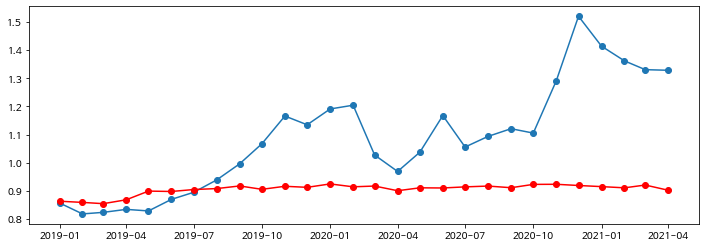

In [ ]:
fig = plt.figure(figsize = (12, 4)) 
y_pred = model_incheon.predict(X_test)
y_pred2 = pd.DataFrame(y_pred, index=X_test.index)
#pd.DataFrame(train_sc, index=train.index)
#print(y_pred2)
plt.plot(y_test, 'o-', label='Predicted')
#plt.xticks(X_test.index)
plt.plot(y_pred2, 'o-', color='red')

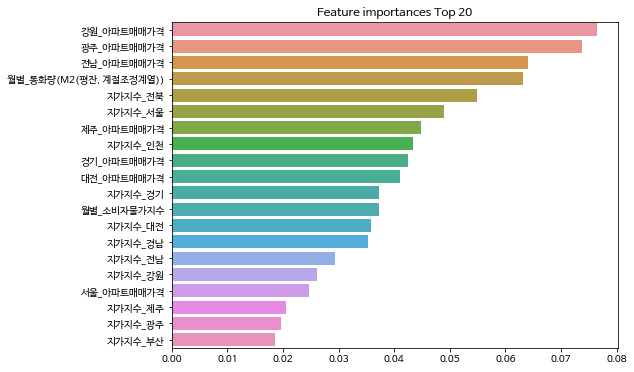

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


importances_values =model_incheon.feature_importances_
importances = pd.Series(importances_values, index=X_train.columns)
top20 = importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x = top20, y = top20.index)
plt.show()



---





---



## LSTM을 통한 전국 아파트 매매가 예측

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

#### Train(2007~2019) Test(2019~2021.04)

In [ ]:
split_date = pd.Timestamp('01-01-2019')
df_lstm = df[['월별_google_trend', '전국지가지수', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율',
        '주택인허가실적(전국)','월별 아파트 매매현황(동호수)전국','전국_아파트매매가격']]
train = df_lstm.loc[:split_date]
test = df_lstm.loc[split_date:]
print(train.shape), print((test.shape))

(145, 9)
(28, 9)


(None, None)

In [ ]:
train.tail(5)

,월별_google_trend,전국지가지수,월별_정기예금금리,월별_소비자물가지수,"월별_통화량(M2(평잔, 계절조정계열))",월별_환율,주택인허가실적(전국),월별 아파트 매매현황(동호수)전국,전국_아파트매매가격
DATE,,,,,,,,,
2014-09-01,29,81.837,2.27,99.608,2036012.5,1050.6,37726,62271,325.0
2014-10-01,31,82.003,2.17,99.308,2053472.3,1054.0,45475,78826,314.4
2014-11-01,28,82.133,2.10,99.108,2078884.7,1101.1,49181,64712,311.0
2014-12-01,24,82.270,2.16,99.098,2085332.1,1099.2,69267,64682,320.9
2015-01-01,30,82.387,2.08,99.770,2094265.7,1090.8,33271,57418,329.8


In [ ]:
df_lstm.columns

Index(['월별_google_trend', '전국지가지수', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율', '주택인허가실적(전국)', '월별 아파트 매매현황(동호수)전국',
       '전국_아파트매매가격'],
      dtype='object')

In [ ]:
df_lstm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 172 entries, 2007-01-01 to 2021-04-01
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   월별_google_trend         172 non-null    int64  
 1   전국지가지수                  172 non-null    float64
 2   월별_정기예금금리               172 non-null    float64
 3   월별_소비자물가지수              172 non-null    float64
 4   월별_통화량(M2(평잔, 계절조정계열))  172 non-null    float64
 5   월별_환율                   172 non-null    float64
 6   주택인허가실적(전국)             172 non-null    int64  
 7   월별 아파트 매매현황(동호수)전국      172 non-null    int64  
 8   전국_아파트매매가격              172 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 18.4 KB


In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

train_sc

array([[1.        , 0.        , 0.66465863, ..., 0.07477576, 0.39210083,
        0.04437956],
       [0.7       , 0.0117524 , 0.69477912, ..., 0.11026288, 0.30005536,
        0.03854015],
       [0.58333333, 0.02230965, 0.68674699, ..., 0.1244689 , 0.37145174,
        0.05839416],
       ...,
       [0.11666667, 0.96937404, 0.13052209, ..., 0.27243645, 0.31791089,
        0.44846715],
       [0.06666667, 0.9853095 , 0.15060241, ..., 0.60893359, 0.21390595,
        0.4329927 ],
       [0.15      , 1.        , 0.14257028, ..., 0.19891545, 0.18456726,
        0.40554745]])

In [ ]:
train_sc_df = pd.DataFrame(train_sc,columns=['월별_google_trend', '전국지가지수', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율', '주택인허가실적(전국)', '월별 아파트 매매현황(동호수)전국',
       '전국_아파트매매가격','주택담보대출금리'] , index=train.index)
test_sc_df = pd.DataFrame(test_sc,columns=['월별_google_trend', '전국지가지수', '월별_정기예금금리', '월별_소비자물가지수',
       '월별_통화량(M2(평잔, 계절조정계열))', '월별_환율', '주택인허가실적(전국)', '월별 아파트 매매현황(동호수)전국',
       '전국_아파트매매가격','주택담보대출금리'], index=test.index)

In [ ]:
train_sc_df.head(3)

,월별_google_trend,전국지가지수,월별_정기예금금리,월별_소비자물가지수,"월별_통화량(M2(평잔, 계절조정계열))",월별_환율,주택인허가실적(전국),월별 아파트 매매현황(동호수)전국,전국_아파트매매가격,주택담보대출금리
DATE,,,,,,,,,,
2007-01-01,1.000000,0.000000,0.664659,0.000000,0.000000,0.055008,0.392101,0.074776,0.044380,0.701220
2007-02-01,0.700000,0.011752,0.694779,0.021951,0.005861,0.050739,0.300055,0.110263,0.038540,0.715447
2007-03-01,0.583333,0.022310,0.686747,0.040784,0.009392,0.054023,0.371452,0.124469,0.058394,0.719512


In [ ]:
test_sc_df

,월별_google_trend,전국지가지수,월별_정기예금금리,월별_소비자물가지수,"월별_통화량(M2(평잔, 계절조정계열))",월별_환율,주택인허가실적(전국),월별 아파트 매매현황(동호수)전국,전국_아파트매매가격,주택담보대출금리
DATE,,,,,,,,,,
2019-01-01,0.150000,1.000000,0.142570,0.943623,1.000000,0.344499,0.184567,0.198915,0.405547,0.093496
2019-02-01,0.150000,1.012400,0.122490,0.961615,1.005399,0.345484,0.145792,0.262467,0.376934,0.085366
2019-03-01,0.100000,1.026543,0.126506,0.953619,1.017519,0.378325,0.190425,0.315943,0.425401,0.077236
2019-04-01,0.100000,1.041532,0.112450,0.968812,1.025935,0.411823,0.243631,0.221234,0.509781,0.065041
2019-05-01,0.100000,1.057168,0.110442,0.976010,1.033330,0.464039,0.241275,0.182610,0.654891,0.054878
2019-06-01,0.066667,1.072506,0.098394,0.969212,1.046395,0.409524,0.234980,0.226352,0.846715,0.016260
2019-07-01,0.100000,1.088591,0.080321,0.956417,1.054168,0.450903,0.353030,0.171280,0.910365,-0.004065
2019-08-01,0.100000,1.104377,0.046185,0.966413,1.070130,0.505419,0.367268,0.178746,0.781898,-0.038618
2019-09-01,0.133333,1.119865,0.054217,0.982007,1.080602,0.482594,0.347726,0.194244,0.833285,-0.030488


In [ ]:
train_sc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 97 entries, 2007-01-01 to 2015-01-01
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   월별_google_trend         97 non-null     float64
 1   전국지가지수                  97 non-null     float64
 2   월별_정기예금금리               97 non-null     float64
 3   월별_소비자물가지수              97 non-null     float64
 4   월별_통화량(M2(평잔, 계절조정계열))  97 non-null     float64
 5   월별_환율                   97 non-null     float64
 6   주택인허가실적(전국)             97 non-null     float64
 7   월별 아파트 매매현황(동호수)전국      97 non-null     float64
 8   전국_아파트매매가격              97 non-null     float64
dtypes: float64(9)
memory usage: 7.6 KB


#### LSTM, 지난 6개월 기준, 학습 

In [ ]:
for s in range(1,7):
    train_sc_df['전국_아파트매매가격_{}'.format(s)] = train_sc_df['전국_아파트매매가격'].shift(s)
    test_sc_df['전국_아파트매매가격_{}'.format(s)] = test_sc_df['전국_아파트매매가격'].shift(s)

    train_sc_df['월별_환율_{}'.format(s)] = train_sc_df['월별_환율'].shift(s)
    test_sc_df['월별_환율_{}'.format(s)] = test_sc_df['월별_환율'].shift(s)

    train_sc_df['월별_google_trend_{}'.format(s)] = train_sc_df['월별_google_trend'].shift(s)
    test_sc_df['월별_google_trend{}'.format(s)] = test_sc_df['월별_google_trend'].shift(s)

    train_sc_df['전국지가지수_{}'.format(s)] = train_sc_df['전국지가지수'].shift(s)
    test_sc_df['전국지가지수_{}'.format(s)] = test_sc_df['전국지가지수'].shift(s)

    train_sc_df['월별_정기예금금리_{}'.format(s)] = train_sc_df['월별_정기예금금리'].shift(s)
    test_sc_df['월별_정기예금금리_{}'.format(s)] = test_sc_df['월별_정기예금금리'].shift(s)

    train_sc_df['월별_통화량(M2(평잔, 계절조정계열))_{}'.format(s)] = train_sc_df['월별_통화량(M2(평잔, 계절조정계열))'].shift(s)
    test_sc_df['월별_통화량(M2(평잔, 계절조정계열))_{}'.format(s)] = test_sc_df['월별_통화량(M2(평잔, 계절조정계열))'].shift(s)

    train_sc_df['월별 아파트 매매현황(동호수)전국_{}'.format(s)] = train_sc_df['월별 아파트 매매현황(동호수)전국'].shift(s)
    test_sc_df['월별 아파트 매매현황(동호수)전국_{}'.format(s)] = test_sc_df['월별 아파트 매매현황(동호수)전국'].shift(s)

    train_sc_df['주택인허가실적(전국)_{}'.format(s)] = train_sc_df['주택인허가실적(전국)'].shift(s)
    test_sc_df['주택인허가실적(전국)_{}'.format(s)] = test_sc_df['주택인허가실적(전국)'].shift(s)

    train_sc_df['월별_소비자물가지수_{}'.format(s)] = train_sc_df['월별_소비자물가지수'].shift(s)
    test_sc_df['월별_소비자물가지수_{}'.format(s)] = test_sc_df['월별_소비자물가지수'].shift(s)

    train_sc_df['주택담보대출금리_{}'.format(s)] = train_sc_df['주택담보대출금리'].shift(s)
    test_sc_df['주택담보대출금리_{}'.format(s)] = test_sc_df['주택담보대출금리'].shift(s)
                            
train_sc_df.tail(13)

,월별_google_trend,전국지가지수,월별_정기예금금리,월별_소비자물가지수,"월별_통화량(M2(평잔, 계절조정계열))",월별_환율,주택인허가실적(전국),월별 아파트 매매현황(동호수)전국,전국_아파트매매가격,주택담보대출금리,전국_아파트매매가격_1,월별_환율_1,월별_google_trend_1,전국지가지수_1,월별_정기예금금리_1,"월별_통화량(M2(평잔, 계절조정계열))_1",월별 아파트 매매현황(동호수)전국_1,주택인허가실적(전국)_1,월별_소비자물가지수_1,주택담보대출금리_1,전국_아파트매매가격_2,월별_환율_2,월별_google_trend_2,전국지가지수_2,월별_정기예금금리_2,"월별_통화량(M2(평잔, 계절조정계열))_2",월별 아파트 매매현황(동호수)전국_2,주택인허가실적(전국)_2,월별_소비자물가지수_2,주택담보대출금리_2,전국_아파트매매가격_3,월별_환율_3,월별_google_trend_3,전국지가지수_3,월별_정기예금금리_3,"월별_통화량(M2(평잔, 계절조정계열))_3",월별 아파트 매매현황(동호수)전국_3,주택인허가실적(전국)_3,월별_소비자물가지수_3,주택담보대출금리_3,전국_아파트매매가격_4,월별_환율_4,월별_google_trend_4,전국지가지수_4,월별_정기예금금리_4,"월별_통화량(M2(평잔, 계절조정계열))_4",월별 아파트 매매현황(동호수)전국_4,주택인허가실적(전국)_4,월별_소비자물가지수_4,주택담보대출금리_4,전국_아파트매매가격_5,월별_환율_5,월별_google_trend_5,전국지가지수_5,월별_정기예금금리_5,"월별_통화량(M2(평잔, 계절조정계열))_5",월별 아파트 매매현황(동호수)전국_5,주택인허가실적(전국)_5,월별_소비자물가지수_5,주택담보대출금리_5,전국_아파트매매가격_6,월별_환율_6,월별_google_trend_6,전국지가지수_6,월별_정기예금금리_6,"월별_통화량(M2(평잔, 계절조정계열))_6",월별 아파트 매매현황(동호수)전국_6,주택인허가실적(전국)_6,월별_소비자물가지수_6,주택담보대출금리_6
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01,0.166667,0.794682,0.092369,0.910836,0.894465,0.269458,0.393375,0.234154,0.864234,0.164634,0.788905,0.269294,0.116667,0.780140,0.096386,0.872547,0.626649,0.377502,0.893643,0.154472,0.711825,0.287356,0.100000,0.765898,0.088353,0.867522,0.312396,0.403236,0.878848,0.148374,0.635036,0.357307,0.083333,0.751656,0.058233,0.859436,0.293867,0.297519,0.909636,0.136179,0.614891,0.392939,0.066667,0.739007,0.038153,0.854084,0.363307,0.489000,0.913635,0.117886,0.528759,0.353695,0.200000,0.724864,0.030120,0.849757,0.301277,0.609328,0.908836,0.126016,0.771971,0.347619,0.116667,0.709526,0.026104,0.838226,0.311700,0.626128,0.885246,0.126016
2018-02-01,0.166667,0.808525,0.090361,0.942423,0.903878,0.268637,0.417075,0.269560,0.738394,0.162602,0.864234,0.269458,0.166667,0.794682,0.092369,0.894465,0.234154,0.393375,0.910836,0.164634,0.788905,0.269294,0.116667,0.780140,0.096386,0.872547,0.626649,0.377502,0.893643,0.154472,0.711825,0.287356,0.100000,0.765898,0.088353,0.867522,0.312396,0.403236,0.878848,0.148374,0.635036,0.357307,0.083333,0.751656,0.058233,0.859436,0.293867,0.297519,0.909636,0.136179,0.614891,0.392939,0.066667,0.739007,0.038153,0.854084,0.363307,0.489000,0.913635,0.117886,0.528759,0.353695,0.200000,0.724864,0.030120,0.849757,0.301277,0.609328,0.908836,0.126016
2018-03-01,0.166667,0.824312,0.100402,0.938025,0.906594,0.261248,0.580363,0.239018,0.631533,0.160569,0.738394,0.268637,0.166667,0.808525,0.090361,0.903878,0.269560,0.417075,0.942423,0.162602,0.864234,0.269458,0.166667,0.794682,0.092369,0.894465,0.234154,0.393375,0.910836,0.164634,0.788905,0.269294,0.116667,0.780140,0.096386,0.872547,0.626649,0.377502,0.893643,0.154472,0.711825,0.287356,0.100000,0.765898,0.088353,0.867522,0.312396,0.403236,0.878848,0.148374,0.635036,0.357307,0.083333,0.751656,0.058233,0.859436,0.293867,0.297519,0.909636,0.136179,0.614891,0.392939,0.066667,0.739007,0.038153,0.854084,0.363307,0.489000,0.913635,0.117886
2018-04-01,0.066667,0.839251,0.096386,0.945622,0.917800,0.277176,0.378481,0.290314,0.528175,0.164634,0.631533,0.261248,0.166667,0.824312,0.100402,0.906594,0.239018,0.580363,0.938025,0.160569,0.738394,0.268637,0.166667,0.808525,0.090361,0.903878,0.269560,0.417075,0.942423,0.162602,0.864234,0.269458,0.166667,0.794682,0.092369,0.894465,0.234154,0.393375,0.910836,0.164634,0.788905,0.269294,0.116667,0.780140,0.096386,0.872547,0.626649,0.377502,0.893643,0.154472,0.711825,0.287356,0.100000,0.765898,0.088353,0.867522,0.312396,0.403236,0.878848,0.148374,0.635036,0.357307,0.083333,0.751656,0.058233,0.859436,0.293867,0.297519,0.909636,0.136179
2018-05-01,0.066667,0.854888,0.102410,0.947621,0.925663,0.285550,0.322108,0.241751,0.544526,0.168699,0.528175,0.277176,0.066667,0.839251,0.096386,0.917800,0.290314,0.378481,0.945622,0.164634,0.631533,0.261248,0.166667,0.824312,0.100402,0.906594,0.239018,0.580363,0.938025,0.160569,0.738394,0.268637,0.166667,0.808525,0.090361,0.903878,0.269560,0.417075,0.942

In [ ]:
X_train = train_sc_df.dropna().drop('전국_아파트매매가격', axis=1)
# y_train = train_sc_df.dropna()[['전국_아파트매매가격']]
X_train = X_train.dropna().drop('월별_환율', axis=1)
#y_train = train_sc_df.dropna()[['월별_환율']]
X_train = X_train.dropna().drop('월별_google_trend', axis=1)
#y_train = train_sc_df.dropna()[['월별_google_trend']]
X_train = X_train.dropna().drop('전국지가지수', axis=1)
#y_train = train_sc_df.dropna()[['전국지가지수']]
X_train = X_train.dropna().drop('월별_정기예금금리', axis=1)
#y_train = train_sc_df.dropna()[['월별_정기예금금리']]
X_train = X_train.dropna().drop('월별_소비자물가지수', axis=1)
#y_train = train_sc_df.dropna()[['월별_소비자물가지수']]
X_train = X_train.dropna().drop('월별_통화량(M2(평잔, 계절조정계열))', axis=1)
#y_train = train_sc_df.dropna()[['월별_통화량(M2(평잔, 계절조정계열))']]
X_train = X_train.dropna().drop('월별 아파트 매매현황(동호수)전국', axis=1)
#y_train = train_sc_df.dropna()[['월별 아파트 매매현황(동호수)전국']]
X_train = X_train.dropna().drop('주택인허가실적(전국)', axis=1)

X_train = X_train.dropna().drop('주택담보대출금리', axis=1)

X_test = test_sc_df.dropna().drop('전국_아파트매매가격', axis=1)
# # y_test = test_sc_df.dropna()[['전국_아파트매매가격']]
X_test = X_test.dropna().drop('월별_환율', axis=1)
# #y_test = test_sc_df.dropna()[['월별_환율']]
X_test = X_test.dropna().drop('월별_google_trend', axis=1)
# #y_test = test_sc_df.dropna()[['월별_google_trend']]
X_test = X_test.dropna().drop('전국지가지수', axis=1)
# #y_test = test_sc_df.dropna()[['전국지가지수']]
X_test = X_test.dropna().drop('월별_정기예금금리', axis=1)
# #y_test = test_sc_df.dropna()[['월별_정기예금금리']]
X_test = X_test.dropna().drop('월별_소비자물가지수', axis=1)
# #y_test = test_sc_df.dropna()[['월별_소비자물가지수']]
X_test = X_test.dropna().drop('월별_통화량(M2(평잔, 계절조정계열))', axis=1)
# #y_test = test_sc_df.dropna()[['월별_통화량(M2(평잔, 계절조정계열))']]
X_test = X_test.dropna().drop('월별 아파트 매매현황(동호수)전국', axis=1)
# #y_test = test_sc_df.dropna()[['월별 아파트 매매현황(동호수)전국']]
X_test = X_test.dropna().drop('주택인허가실적(전국)', axis=1)

X_test = X_test.dropna().drop('주택담보대출금리', axis=1)


# X_train = train_sc_df.dropna().drop('전국_아파트매매가격', axis=1)
y_train = train_sc_df.dropna()[['전국_아파트매매가격']]
y_test = test_sc_df.dropna()[['전국_아파트매매가격']]
X_train.tail(5)

,전국_아파트매매가격_1,월별_환율_1,월별_google_trend_1,전국지가지수_1,월별_정기예금금리_1,"월별_통화량(M2(평잔, 계절조정계열))_1",월별 아파트 매매현황(동호수)전국_1,주택인허가실적(전국)_1,월별_소비자물가지수_1,주택담보대출금리_1,전국_아파트매매가격_2,월별_환율_2,월별_google_trend_2,전국지가지수_2,월별_정기예금금리_2,"월별_통화량(M2(평잔, 계절조정계열))_2",월별 아파트 매매현황(동호수)전국_2,주택인허가실적(전국)_2,월별_소비자물가지수_2,주택담보대출금리_2,전국_아파트매매가격_3,월별_환율_3,월별_google_trend_3,전국지가지수_3,월별_정기예금금리_3,"월별_통화량(M2(평잔, 계절조정계열))_3",월별 아파트 매매현황(동호수)전국_3,주택인허가실적(전국)_3,월별_소비자물가지수_3,주택담보대출금리_3,전국_아파트매매가격_4,월별_환율_4,월별_google_trend_4,전국지가지수_4,월별_정기예금금리_4,"월별_통화량(M2(평잔, 계절조정계열))_4",월별 아파트 매매현황(동호수)전국_4,주택인허가실적(전국)_4,월별_소비자물가지수_4,주택담보대출금리_4,전국_아파트매매가격_5,월별_환율_5,월별_google_trend_5,전국지가지수_5,월별_정기예금금리_5,"월별_통화량(M2(평잔, 계절조정계열))_5",월별 아파트 매매현황(동호수)전국_5,주택인허가실적(전국)_5,월별_소비자물가지수_5,주택담보대출금리_5,전국_아파트매매가격_6,월별_환율_6,월별_google_trend_6,전국지가지수_6,월별_정기예금금리_6,"월별_통화량(M2(평잔, 계절조정계열))_6",월별 아파트 매매현황(동호수)전국_6,주택인허가실적(전국)_6,월별_소비자물가지수_6,주택담보대출금리_6
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-09-01,1.000000,0.330706,0.100000,0.909417,0.096386,0.955815,0.237900,0.333758,0.968013,0.142276,0.746277,0.343678,0.066667,0.890145,0.098394,0.944465,0.362108,0.288173,0.931228,0.158537,0.591241,0.351888,0.083333,0.871769,0.106426,0.934869,0.275039,0.301227,0.939224,0.162602,0.544526,0.285550,0.066667,0.854888,0.102410,0.925663,0.241751,0.322108,0.947621,0.168699,0.528175,0.277176,0.066667,0.839251,0.096386,0.917800,0.290314,0.378481,0.945622,0.164634,0.631533,0.261248,0.166667,0.824312,0.100402,0.906594,0.239018,0.580363,0.938025,0.160569
2018-10-01,0.745985,0.337110,0.216667,0.929037,0.104418,0.953480,0.188014,0.473564,1.000000,0.128049,1.000000,0.330706,0.100000,0.909417,0.096386,0.955815,0.237900,0.333758,0.968013,0.142276,0.746277,0.343678,0.066667,0.890145,0.098394,0.944465,0.362108,0.288173,0.931228,0.158537,0.591241,0.351888,0.083333,0.871769,0.106426,0.934869,0.275039,0.301227,0.939224,0.162602,0.544526,0.285550,0.066667,0.854888,0.102410,0.925663,0.241751,0.322108,0.947621,0.168699,0.528175,0.277176,0.066667,0.839251,0.096386,0.917800,0.290314,0.378481,0.945622,0.164634
2018-11-01,0.515620,0.382923,0.166667,0.950102,0.120482,0.969403,0.222868,0.612662,0.992403,0.132114,0.745985,0.337110,0.216667,0.929037,0.104418,0.953480,0.188014,0.473564,1.000000,0.128049,1.000000,0.330706,0.100000,0.909417,0.096386,0.955815,0.237900,0.333758,0.968013,0.142276,0.746277,0.343678,0.066667,0.890145,0.098394,0.944465,0.362108,0.288173,0.931228,0.158537,0.591241,0.351888,0.083333,0.871769,0.106426,0.934869,0.275039,0.301227,0.939224,0.162602,0.544526,0.285550,0.066667,0.854888,0.102410,0.925663,0.241751,0.322108,0.947621,0.168699
2018-12-01,0.448467,0.352053,0.116667,0.969374,0.130522,0.975869,0.272436,0.317911,0.962415,0.126016,0.515620,0.382923,0.166667,0.950102,0.120482,0.969403,0.222868,0.612662,0.992403,0.132114,0.745985,0.337110,0.216667,0.929037,0.104418,0.953480,0.188014,0.473564,1.000000,0.128049,1.000000,0.330706,0.100000,0.909417,0.096386,0.955815,0.237900,0.333758,0.968013,0.142276,0.746277,0.343678,0.066667,0.890145,0.098394,0.944465,0.362108,0.288173,0.931228,0.158537,0.591241,0.351888,0.083333,0.871769,0.106426,0.934869,0.275039,0.301227,0.939224,0.162602
2019-01-01,0.432993,0.345977,0.066667,0.985309,0.150602,0.980976,0.608934,0.213906,0.948021,0.107724,0.448467,0.352053,0.116667,0.969374,0.130522,0.975869,0.272436,0.317911,0.962415,0.126016,0.515620,0.382923,0.166667,0.950102,0.120482,0.969403,0.222868,0.612662,0.992403,0.132114,0.745985,0.337110,0.216667,0.929037,0.104418,0.953480,0.188014,0.473564,1.000000,0.128049,1.000000,0.330706,0.100000,0.909417,0.096386,0.955815,0.237900,0.333758,0.968013,0.142276,0.746277,0.343678,0.066667,0.890145,0.098394,0.944465,0.362108,0.288173,0.931228,0.158537


In [ ]:
print(type(X_train))
X_train = X_train.values
print(type(X_train))
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values
print(X_train.shape)
print(y_train.shape)


print(X_test.shape)
print(y_test.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(139, 60)
(139, 1)
(22, 60)
(22, 1)


In [ ]:
X_train_t = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_t = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("최종 DATA")
print(X_train_t.shape)
print(X_test_t.shape)

최종 DATA
(139, 60, 1)
(22, 60, 1)


In [ ]:
# from sklearn.model_selection import train_test_split

# x_train, x_valid, y_train, y_valid = train_test_split(X_train_t, y_train, test_size=0.2)

# x_train.shape, x_valid.shape

((111, 54, 1), (28, 54, 1))

### 모델링

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model2 = Sequential()
model2.add(LSTM(30, 
               input_shape=(X_train_t.shape[1], 1), 
               activation='relu', 
               return_sequences=False)
          )
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam') 
model2.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 30)                3840      
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 31        
Total params: 3,871
Trainable params: 3,871
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import os
cur_dir = os.getcwd()
model2.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=200)

filename = os.path.join(cur_dir, 'tmp_checkpoint.h5')

checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model2.fit(X_train_t, y_train, 
                    epochs=150, 
                    batch_size=50)
                    # validation_data=(x_valid, y_valid),
                    # callbacks=[early_stop, checkpoint])

Epoch 1/150
14/14 [==============================] - 2s 19ms/step - loss: 0.0174
Epoch 2/150
14/14 [==============================] - 0s 21ms/step - loss: 0.0227
Epoch 3/150
14/14 [==============================] - 0s 20ms/step - loss: 0.0109
Epoch 4/150
14/14 [==============================] - 0s 20ms/step - loss: 0.0108
Epoch 5/150
14/14 [==============================] - 0s 20ms/step - loss: 0.0130
Epoch 6/150
14/14 [==============================] - 0s 19ms/step - loss: 0.0096
Epoch 7/150
14/14 [==============================] - 0s 19ms/step - loss: 0.0100
Epoch 8/150
14/14 [==============================] - 0s 20ms/step - loss: 0.0090
Epoch 9/150
14/14 [==============================] - 0s 19ms/step - loss: 0.0132
Epoch 10/150
14/14 [==============================] - 0s 19ms/step - loss: 0.0114
Epoch 11/150
14/14 [==============================] - 0s 20ms/step - loss: 0.0099
Epoch 12/150
14/14 [==============================] - 0s 20ms/step - loss: 0.0141
Epoch 13/150
14/14 [=====

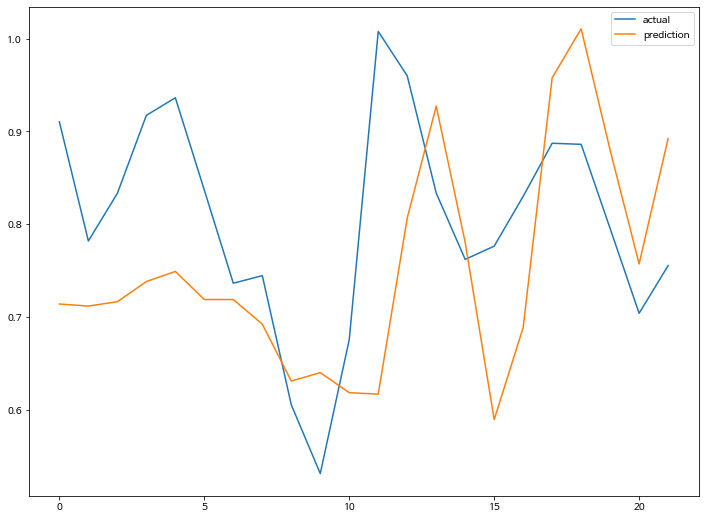

In [ ]:
#model2.load_weights(filename)

plt.figure(figsize=(12, 9))
y_hat = model2.predict(X_test_t)

#a = pd.DataFrame(test_label,index =test_label.index)
#b = pd.DataFrame(pred,index =test_label.index)
plt.plot(y_test, label='actual')
plt.plot(y_hat, label='prediction')
plt.legend()
plt.show()

### 예측결과 시각화

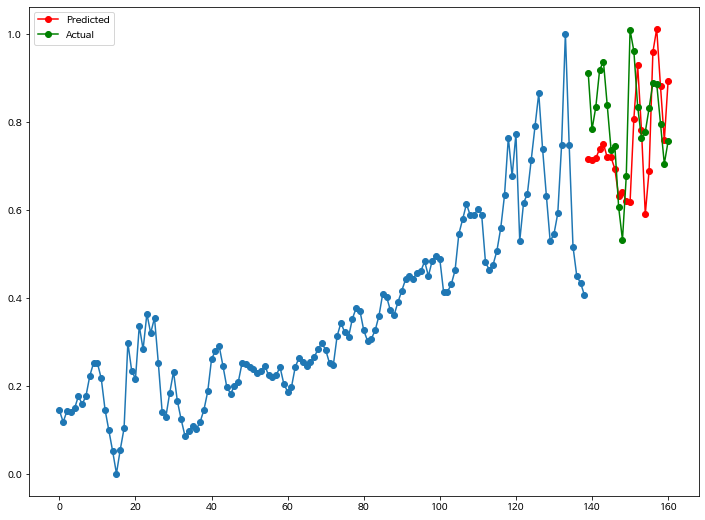

In [ ]:
#model2.load_weights(filename)
y_hat = model2.predict(X_test_t, batch_size=1)


a_axis = np.arange(0, len(y_train))
b_axis = np.arange(len(y_train), len(y_train) + len(y_hat))

plt.figure(figsize=(12,9))
plt.plot(a_axis, y_train.reshape(y_train.shape[0],), 'o-')
plt.plot(b_axis, y_hat.reshape(y_hat.shape[0],), 'o-', color='red', alpha=2.0, label='Predicted')
plt.plot(b_axis, y_test.reshape(y_test.shape[0],), 'o-', color='green', alpha=1.0, label='Actual')
plt.legend()
plt.show()



---





---



In [ ]:
y_hat

In [ ]:
score = model2.evaluate(X_test_t, y_test, batch_size=30)
score

1/1 [==============================] - 1s 669ms/step - loss: 0.0203


0.020318888127803802

In [ ]:
score**0.5

0.1425443374105187